<a href="https://colab.research.google.com/github/g23ai2026/mlbd_project/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages for eda
!pip install  plotly seaborn matplotlib squarify #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
# from pandas_profiling import ProfileReport
from IPython.display import display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Set your data path
data_path = '/content/drive/MyDrive/CSL7110/processed/'

In [ ]:
# Load all 8 CSV files
playlists = pd.read_csv(f'{data_path}playlists.csv')
tracks = pd.read_csv(f'{data_path}tracks.csv')
artists = pd.read_csv(f'{data_path}artists.csv')
albums = pd.read_csv(f'{data_path}albums.csv')
playlist_tracks = pd.read_csv(f'{data_path}playlist_tracks.csv')
track_artists = pd.read_csv(f'{data_path}track_artists.csv')
track_albums = pd.read_csv(f'{data_path}track_albums.csv')
artist_albums = pd.read_csv(f'{data_path}artist_albums.csv')


In [ ]:
tracks.columns

Index(['track_id', 'track_uri', 'track_name', 'duration_ms', 'duration_min'], dtype='object')

In [ ]:
# # Merge track with artist and album info
# track_full = tracks.merge(
#     track_artists, on='track_id'
#     ).merge(
#     artists, on='artist_id'
#     ).merge(
#     track_albums, on='track_id'
#     ).merge(
#     albums, on='album_id'
#     )

# # Merge with playlist info
# full_data = playlist_tracks.merge(
#     track_full, on='track_id'
#     ).merge(
#     playlists, on='pid'
#     )

In [ ]:
def show_basic_stats():
    print("📊 Dataset Overview:")
    datasets = {
        'Playlists': playlists,
        'Tracks': tracks,
        'Artists': artists,
        'Albums': albums,
        'Playlist-Tracks': playlist_tracks,
        'Track-Artists': track_artists,
        'Track-Albums': track_albums,
        'Artist-Albums': artist_albums
    }

    stats = []
    for name, df in datasets.items():
        stats.append({
            'Dataset': name,
            'Rows': df.shape[0],
            'Columns': df.shape[1],
            'Missing Values': df.isnull().sum().sum(),
            'Duplicate Rows': df.duplicated().sum()
        })

    stats_df = pd.DataFrame(stats)
    display(stats_df.style.background_gradient(cmap='Blues'))

    # Memory usage
    print("\n💾 Memory Usage:")
    mem_stats = [(name, f"{df.memory_usage(deep=True).sum()/1024**2:.2f} MB")
                for name, df in datasets.items()]
    display(pd.DataFrame(mem_stats, columns=['Dataset', 'Memory']))

show_basic_stats()

📊 Dataset Overview:


,Dataset,Rows,Columns,Missing Values,Duplicate Rows
0,Playlists,1000000,11,981253,0
1,Tracks,2262292,4,7,0
2,Artists,295860,3,4,0
3,Albums,734684,3,3,0
4,Playlist-Tracks,66346428,3,0,0
5,Track-Artists,2262292,2,0,0
6,Track-Albums,2262292,2,0,0
7,Artist-Albums,849766,2,0,0



💾 Memory Usage:


,Dataset,Memory
0,Playlists,156.25 MB
1,Tracks,404.48 MB
2,Artists,48.90 MB
3,Albums,126.00 MB
4,Playlist-Tracks,1518.55 MB
5,Track-Artists,34.52 MB
6,Track-Albums,34.52 MB
7,Artist-Albums,12.97 MB


🎵 Playlist Characteristics:


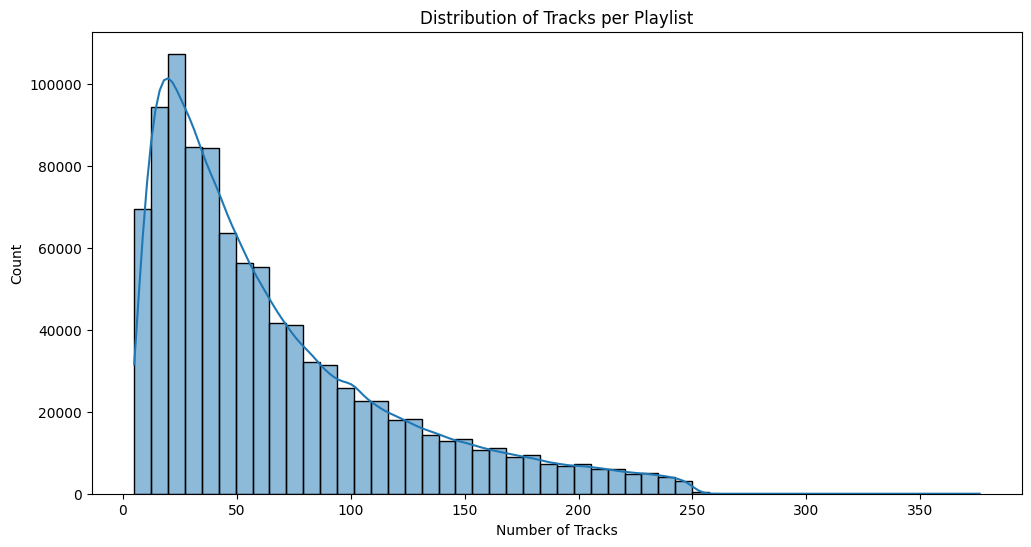

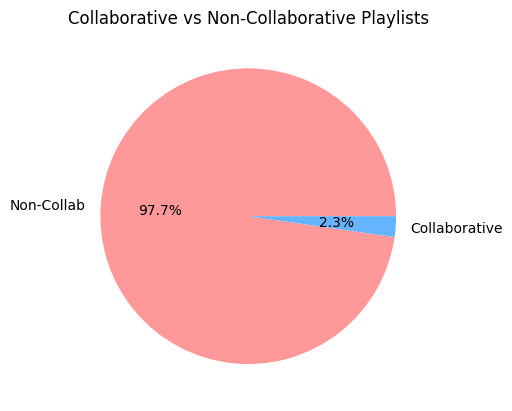


⏱️ Playlist Duration Stats (minutes):


,count,mean,std,min,25%,50%,75%,max
duration_min,1000000.0,259.661281,214.27391,1.625633,99.92305,190.373967,357.228129,10584.5632


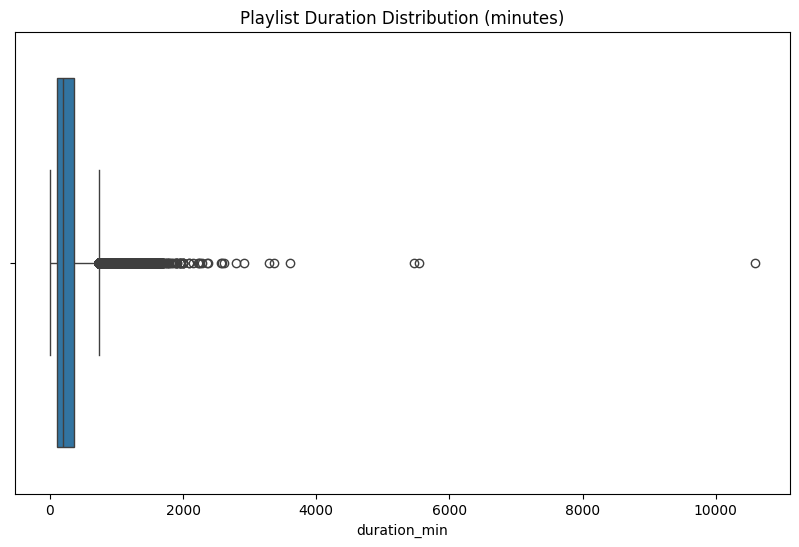

In [ ]:
def analyze_playlists():
    print("🎵 Playlist Characteristics:")

    # Playlist length distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(playlists['num_tracks'], bins=50, kde=True)
    plt.title('Distribution of Tracks per Playlist')
    plt.xlabel('Number of Tracks')
    plt.ylabel('Count')
    plt.show()

    # Top 10 playlist creators (by number of playlists)
    if 'collaborative' in playlists.columns:
        collab_stats = playlists['collaborative'].value_counts(normalize=True)
        plt.pie(collab_stats, labels=['Non-Collab', 'Collaborative'],
                autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
        plt.title('Collaborative vs Non-Collaborative Playlists')
        plt.show()

    # Playlist duration analysis
    playlists['duration_min'] = playlists['duration_ms'] / 60000
    print("\n⏱️ Playlist Duration Stats (minutes):")
    display(playlists['duration_min'].describe().to_frame().T)

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=playlists['duration_min'])
    plt.title('Playlist Duration Distribution (minutes)')
    plt.show()

analyze_playlists()

🎧 Track and Artist Analysis:


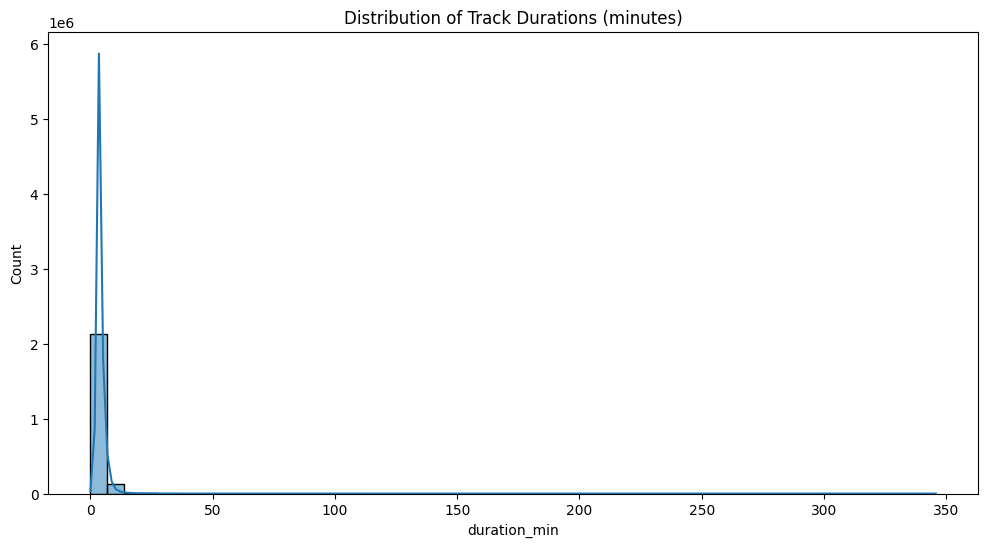

<ipython-input-5-89893ffc78a3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artist_names.values, palette='viridis')


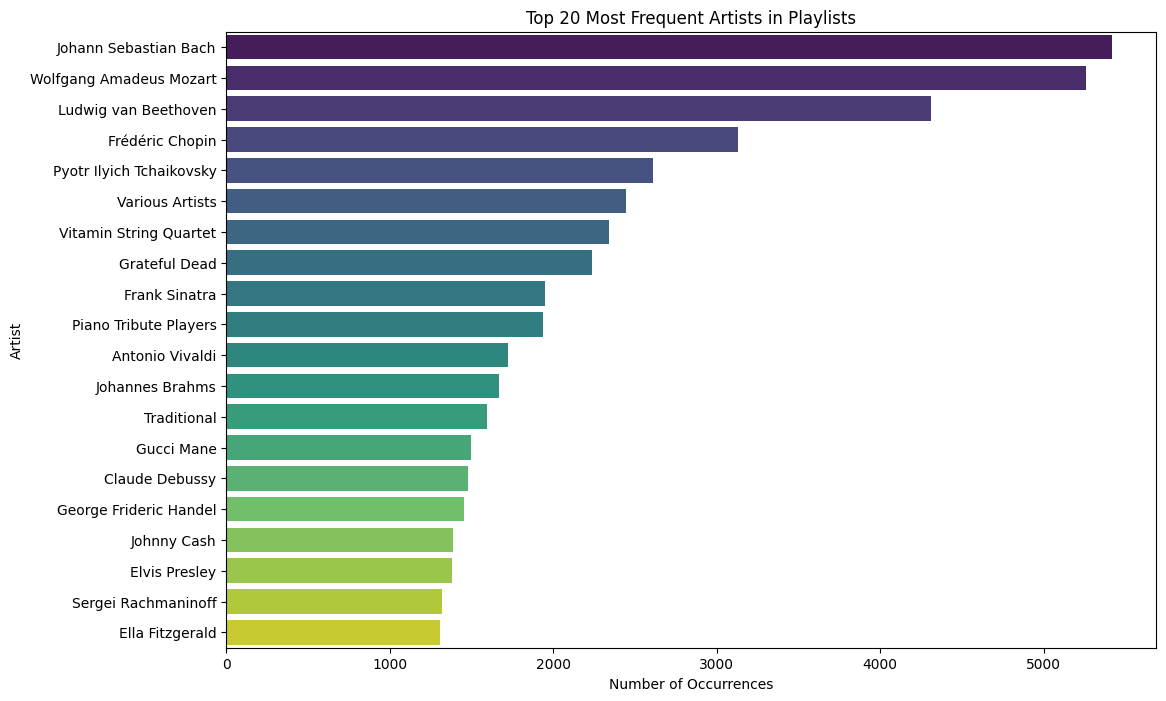

In [ ]:
def analyze_tracks_artists():
    print("🎧 Track and Artist Analysis:")

    # Track duration analysis
    tracks['duration_min'] = tracks['duration_ms'] / 60000
    plt.figure(figsize=(12, 6))
    sns.histplot(tracks['duration_min'], bins=50, kde=True)
    plt.title('Distribution of Track Durations (minutes)')
    plt.show()

    # Top 20 most frequent artists
    top_artists = track_artists['artist_id'].value_counts().head(20)
    top_artist_names = artists.set_index('artist_id').loc[top_artists.index]['artist_name']

    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_artists.values, y=top_artist_names.values, palette='viridis')
    plt.title('Top 20 Most Frequent Artists in Playlists')
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Artist')
    plt.show()

    # # Artist-Playlist Network (Treemap)
    # artist_playlist_count = full_data.groupby('artist_name')['pid'].nunique().sort_values(ascending=False).head(50)
    # plt.figure(figsize=(16, 10))
    # squarify.plot(sizes=artist_playlist_count.values,
    #              label=artist_playlist_count.index,
    #              alpha=0.8,
    #              color=plt.cm.tab20.colors)
    # plt.axis('off')
    # plt.title('Top 50 Artists by Number of Playlists They Appear In')
    # plt.show()

analyze_tracks_artists()


🎧 Track Analysis:


<ipython-input-7-f7a15ee3aaa2>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tracks['count'], y=top_tracks['track_name'], palette='viridis')


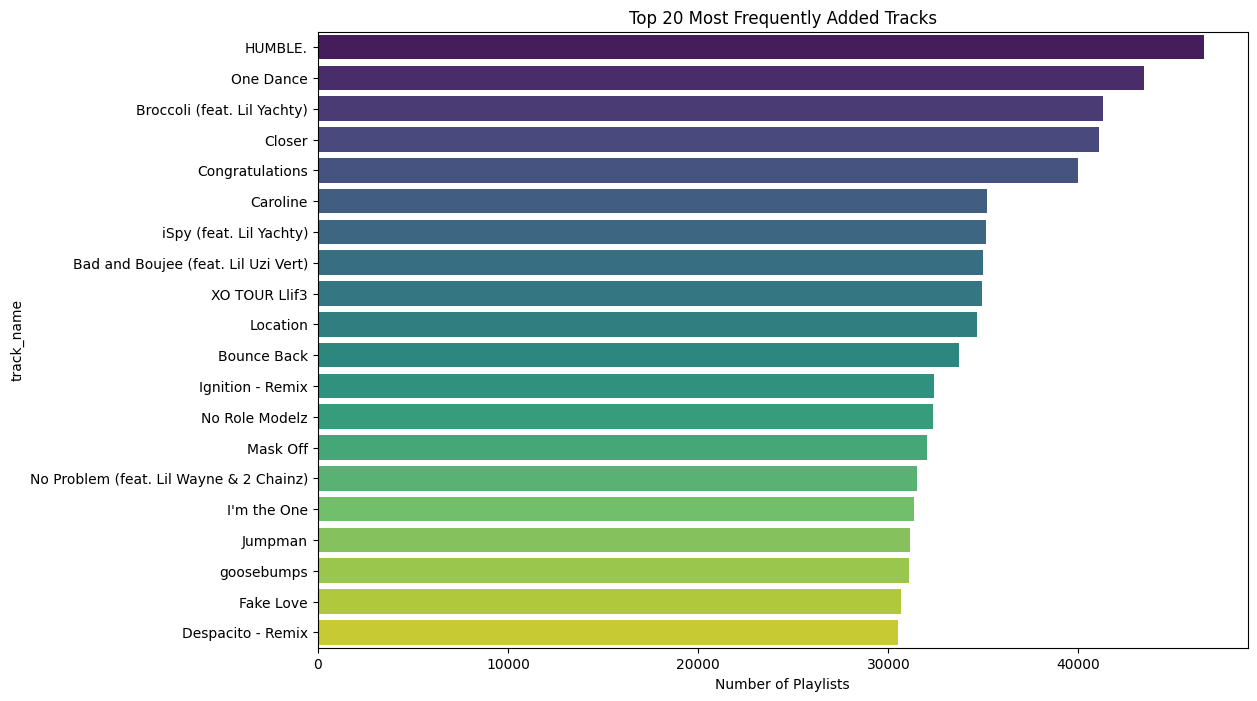

In [ ]:
def analyze_tracks():
    print("\n🎧 Track Analysis:")

    # Track duration distribution
    tracks['duration_min'] = tracks['duration_ms'] / 60000
    # plt.figure(figsize=(12, 6))
    # sns.histplot(tracks['duration_min'].dropna(), bins=50, kde=True)
    # plt.title('Distribution of Track Durations')
    # plt.xlabel('Duration (minutes)')
    # plt.show()

    # Merge just for top tracks
    top_tracks = playlist_tracks['track_id'].value_counts().head(20)
    top_tracks = top_tracks.reset_index().merge(
        tracks, left_on='track_id', right_on='track_id'
    ).nlargest(20, 'count')

    plt.figure(figsize=(12,8))
    sns.barplot(x=top_tracks['count'], y=top_tracks['track_name'], palette='viridis')
    plt.title('Top 20 Most Frequently Added Tracks')
    plt.xlabel('Number of Playlists')
    plt.show()

analyze_tracks()


💿 Album Analysis:


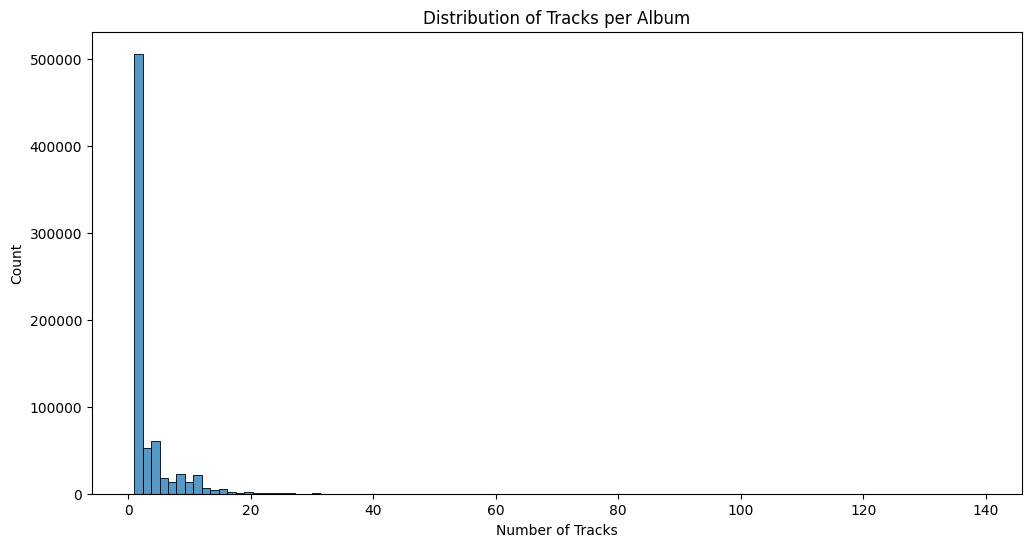

<ipython-input-9-4fa2f0e49141>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=album_popularity[0], y=album_popularity['album_name'], palette='mako')


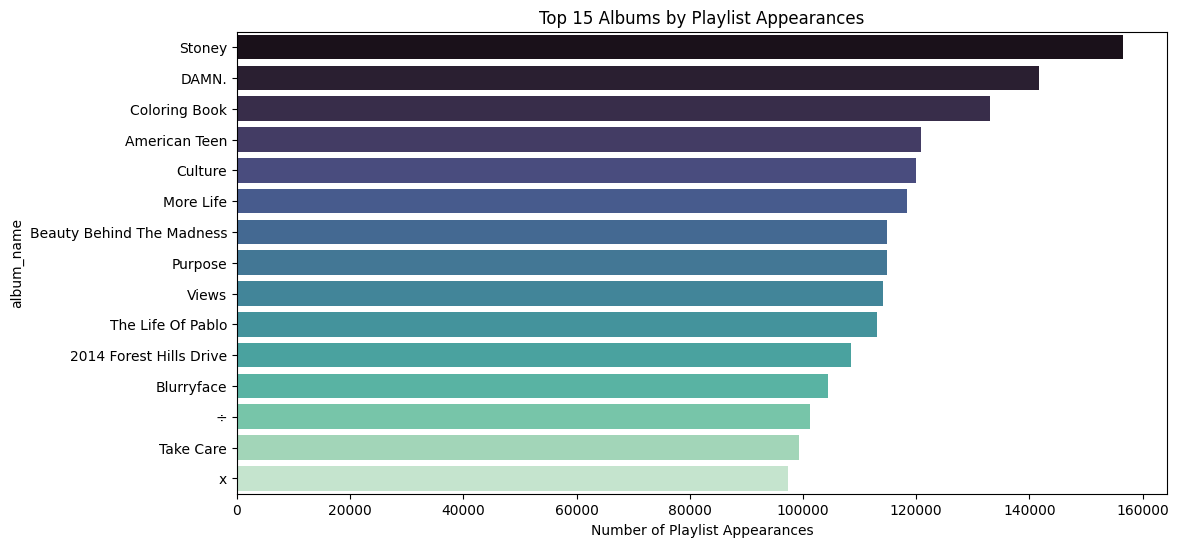

In [ ]:
def analyze_albums():
    print("\n💿 Album Analysis:")

    # Tracks per album
    tracks_per_album = track_albums['album_id'].value_counts()
    plt.figure(figsize=(12,6))
    sns.histplot(tracks_per_album, bins=100)
    plt.title('Distribution of Tracks per Album')
    plt.xlabel('Number of Tracks')
    plt.show()

    # Top albums by track popularity
    album_popularity = track_albums.merge(
        playlist_tracks, on='track_id'
    ).groupby('album_id').size().sort_values(ascending=False).head(15)

    album_popularity = album_popularity.reset_index().merge(
        albums, on='album_id'
    )

    plt.figure(figsize=(12,6))
    sns.barplot(x=album_popularity[0], y=album_popularity['album_name'], palette='mako')
    plt.title('Top 15 Albums by Playlist Appearances')
    plt.xlabel('Number of Playlist Appearances')
    plt.show()

analyze_albums()

📈 Advanced Correlations:


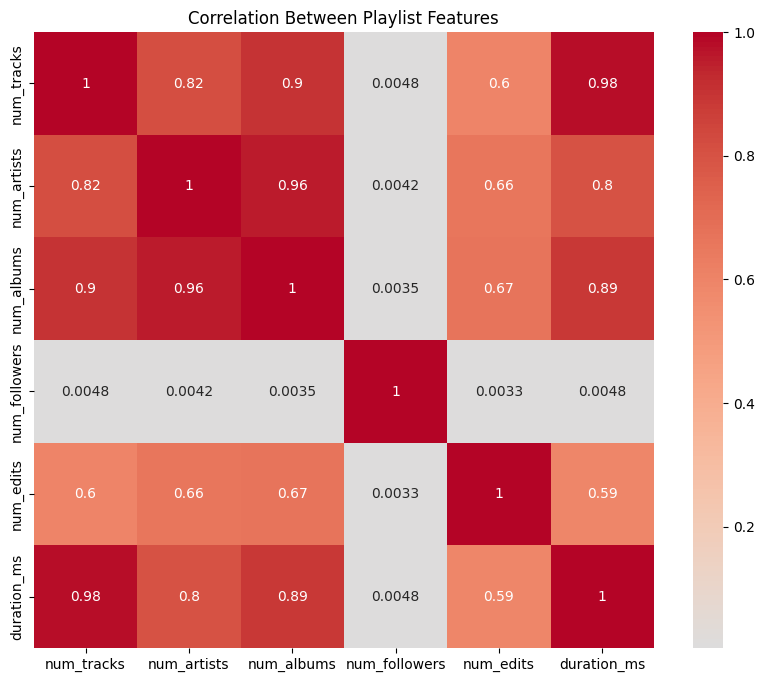

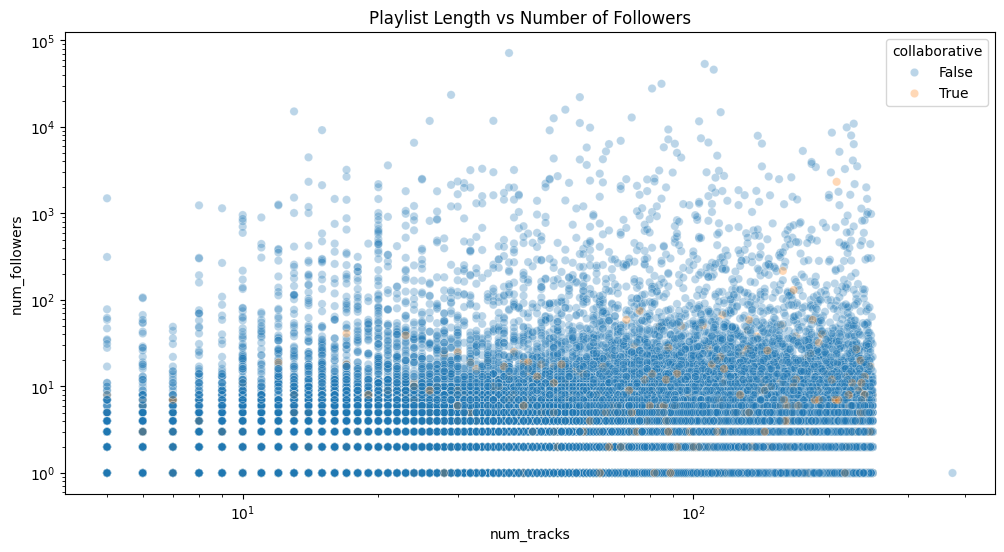

In [ ]:
def analyze_correlations():
    print("📈 Advanced Correlations:")

    # Prepare numerical features
    pl_stats = playlists[['num_tracks', 'num_artists', 'num_albums',
                         'num_followers', 'num_edits', 'duration_ms']]

    # Correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(pl_stats.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Between Playlist Features')
    plt.show()

    # Followers vs playlist length
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=playlists, x='num_tracks', y='num_followers',
                   alpha=0.3, hue='collaborative')
    plt.title('Playlist Length vs Number of Followers')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

analyze_correlations()


📋 Playlist Content Analysis:


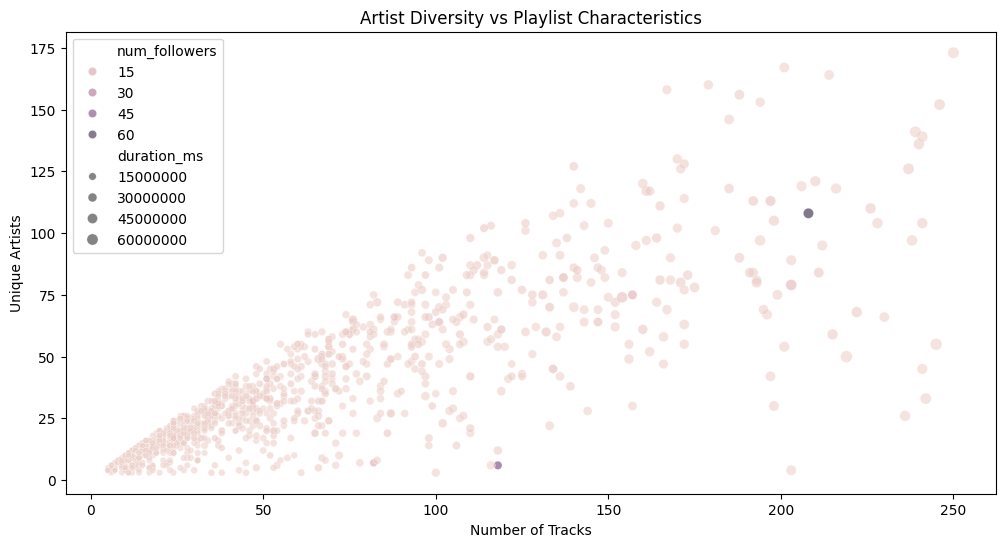

In [ ]:
def analyze_playlist_content():
    print("\n📋 Playlist Content Analysis:")

    # Sample playlists for deep analysis
    sample_pids = playlist_tracks['pid'].drop_duplicates().sample(1000)
    sample_pts = playlist_tracks[playlist_tracks['pid'].isin(sample_pids)]

    # Merge with minimal data
    sample_data = sample_pts.merge(
        tracks[['track_id', 'duration_ms']], on='track_id'
    ).merge(
        track_artists, on='track_id'
    ).merge(
        artists[['artist_id', 'artist_name']], on='artist_id'
    )

    # Artist diversity per playlist
    diversity = sample_data.groupby('pid')['artist_id'].nunique().reset_index()
    diversity = diversity.merge(playlists, on='pid')

    plt.figure(figsize=(12,6))
    sns.scatterplot(x='num_tracks', y='artist_id',
                   hue='num_followers', size='duration_ms',
                   data=diversity, alpha=0.6)
    plt.title('Artist Diversity vs Playlist Characteristics')
    plt.xlabel('Number of Tracks')
    plt.ylabel('Unique Artists')
    plt.show()

analyze_playlist_content()


⏳ Temporal Analysis:


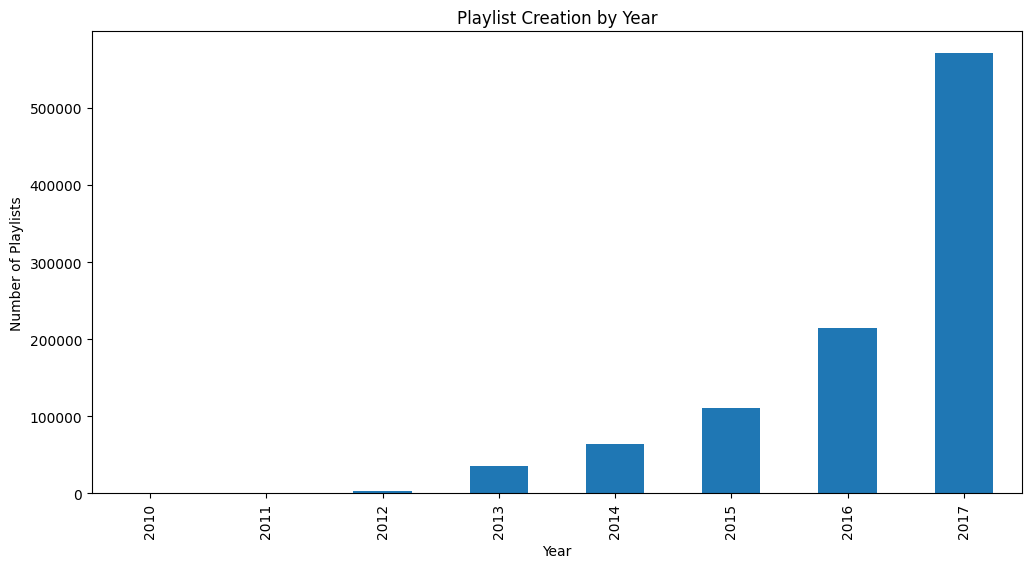

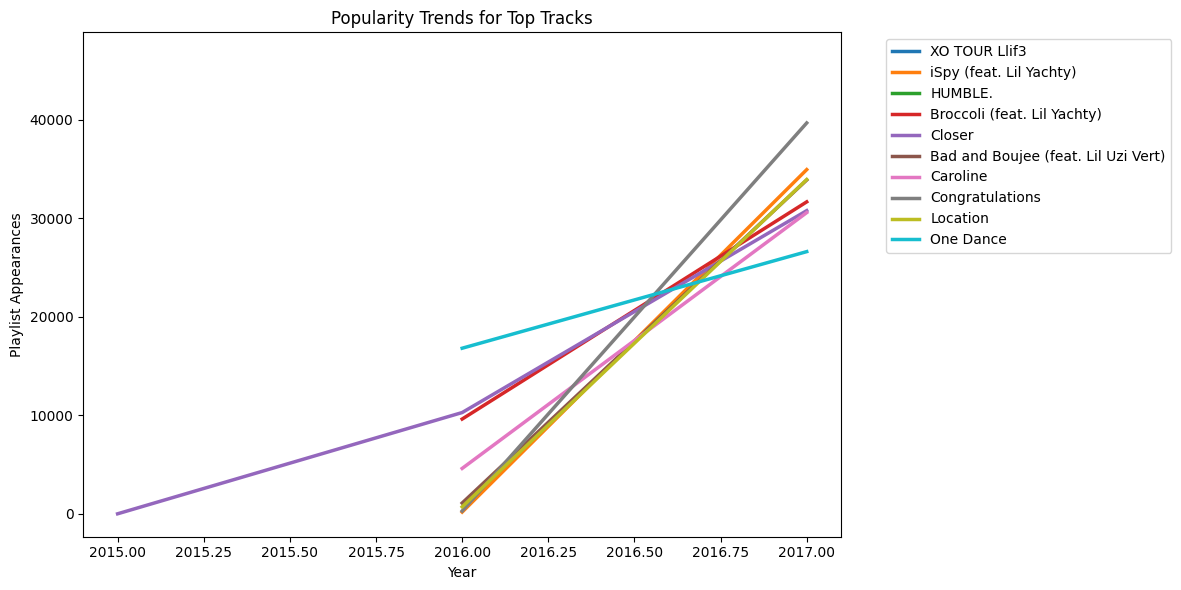

In [ ]:
def analyze_temporal():
    print("\n⏳ Temporal Analysis:")

    # Convert timestamps
    playlists['modified_at'] = pd.to_datetime(playlists['modified_at'], unit='s')
    playlists['year'] = playlists['modified_at'].dt.year

    # Playlist creation over time
    plt.figure(figsize=(12,6))
    playlists['year'].value_counts().sort_index().plot(kind='bar')
    plt.title('Playlist Creation by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Playlists')
    plt.show()

    # Track popularity over time (sampled)
    time_popularity = playlist_tracks.merge(
        playlists[['pid', 'year']], on='pid'
    ).groupby(['track_id', 'year']).size().reset_index(name='count')

    # Get top tracks overall
    top_tracks = playlist_tracks['track_id'].value_counts().nlargest(10).index
    time_top = time_popularity[time_popularity['track_id'].isin(top_tracks)]
    time_top = time_top.merge(tracks, on='track_id')

    plt.figure(figsize=(12,6))
    sns.lineplot(x='year', y='count', hue='track_name',
                data=time_top, linewidth=2.5)
    plt.title('Popularity Trends for Top Tracks')
    plt.xlabel('Year')
    plt.ylabel('Playlist Appearances')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

analyze_temporal()

Playlist Characteristics:

Distribution of playlist lengths (most between 20-100 tracks)

Collaborative vs personal playlist ratio

Average playlist duration

Artist Popularity:

Power law distribution (few artists dominate)

Artist-album network visualization

Track Features:

Typical song duration distribution

Outliers (very short/long tracks)

Correlations:

Between playlist length and followers

Between edits and playlist duration

This EDA provides both statistical summaries and visual storytelling about your dataset. The visualizations are optimized for Colab display and include interactive Plotly charts where beneficial. For very large datasets, consider sampling before generating the full pandas profiling report.